In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from sklearn.ensemble import RandomForestClassifier

In [8]:
data = pd.read_csv('data/pima_diabetes.csv',names= ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])

In [9]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


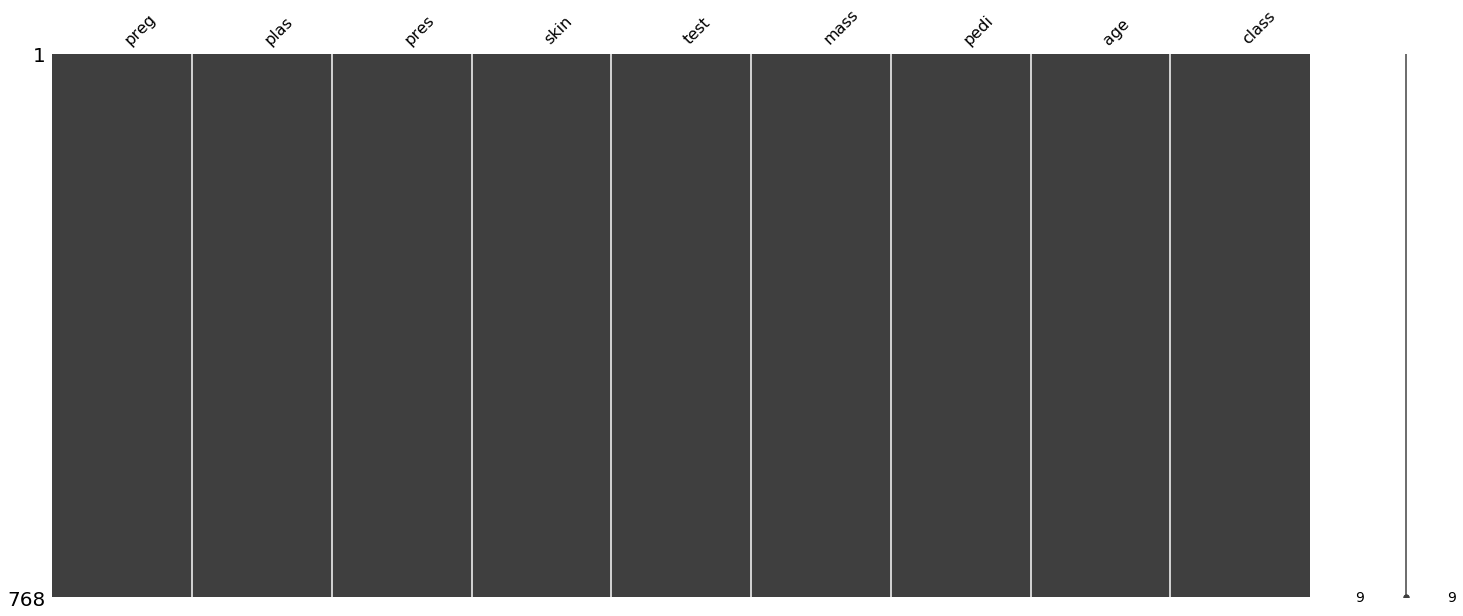

In [10]:
msno.matrix(data)

In [11]:
data.duplicated().sum()

0

In [12]:
mns = MinMaxScaler()
df_mns= mns.fit_transform(data.iloc[:,0:-1])

In [13]:
X = pd.DataFrame(df_mns,columns =data.iloc[:,0:-1].columns.tolist() )
y = data.iloc[:,-1]

In [14]:
#plots after and before scaling 

def subplots_mns(X,data):
    row = X.shape[1]
    col = 2
    
    it=row*col
    for i in range(it):
        if(i%2==0):
            
            col_name = data.iloc[:,int(i/2)].name
            plt.subplot(row,col,i+1)
            plt.grid()
            plt.hist(data[col_name],color= 'green')
            plt.xlabel(str(col_name))
            plt.ylabel('Number of Records')
            if(i==0):
                plt.title('Before MinMax Scaling',fontsize=20,color='red')
            
        
        else:
            col_name = data.iloc[:,int((i-1)/2)].name
            plt.subplot(row,col,i+1)
            plt.grid()
            plt.hist(X[col_name])
            plt.xlabel(str(col_name))
            plt.ylabel('Number of Records')
            if(i==1):
                plt.title('After MinMax Scaling',fontsize=20,color='red')
       
            
#plt.title

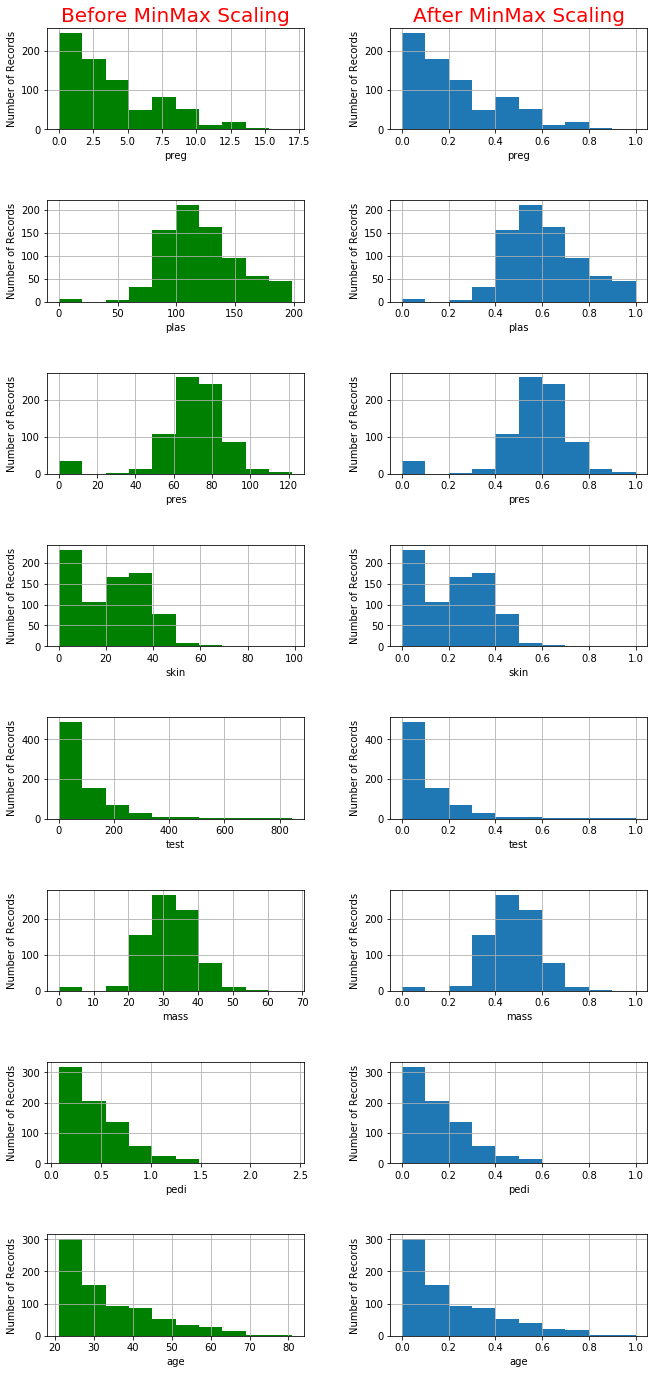

In [15]:
fig = plt.figure(figsize=(10,20))
subplots_mns(X,data)
plt.tight_layout(pad=4.0)
plt.savefig('Before and After MinMax Scaling')

In [16]:
X.iloc[:,1].name

'plas'

In [17]:
X.head(3)

,preg,plas,pres,skin,test,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.0,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.0,0.347243,0.253629,0.183333


In [18]:
y.head(3)

0    1
1    0
2    1
Name: class, dtype: int64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
#Fitting the model and predicting values 
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

In [21]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       107
           1       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154



In [27]:
accuracy_score(y_test,rfc_predict)

0.8246753246753247

In [23]:
confusion_matrix(y_test,rfc_predict)

array([[95, 12],
       [15, 32]])

In [24]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.4min finished


{'n_estimators': 1600, 'max_features': 'auto', 'max_depth': 340}


In [25]:
y_pred_cross = rfc_random.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred_cross)

0.8181818181818182